In [1]:
pip install calplot

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=a4b8609462688d076644f8f440f52ae8401ada9cec8ceeed36e47bb31d314f2c
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calplot
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [4]:
grocery_dataset = pd.read_csv('../input/groceries-dataset/Groceries_dataset.csv')

In [5]:
grocery_dataset

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [6]:
print(grocery_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [7]:
grocery_dataset

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [8]:
# Extracting data for grocery items sold in 2015
df2015 = grocery_dataset[pd.DatetimeIndex(grocery_dataset['Date']).year==2015].\
groupby(['Date']).size().reset_index(name='count').sort_values('Date',ascending=True)

In [9]:
df2015

,Date,count
0,01-01-2015,48
1,01-02-2015,61
2,01-03-2015,76
3,01-04-2015,83
4,01-05-2015,68
...,...,...
359,31-03-2015,54
360,31-05-2015,47
361,31-07-2015,63
362,31-08-2015,47


<Figure size 1080x720 with 0 Axes>

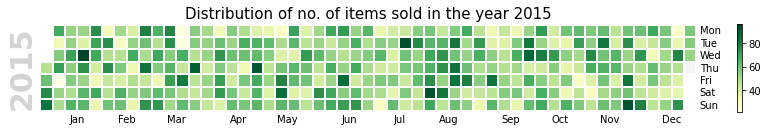

In [10]:
# Visualizing the number of distribution of grocery items sold in 2015
plt.figure(figsize=(15,10))
df2015['Date'] = pd.DatetimeIndex(df2015['Date'])
df2015.set_index("Date", inplace = True,drop = True)
events = df2015["count"]
calplot.calplot(events,cmap='YlGn')
plt.title('Distribution of no. of items sold in the year 2015',fontsize=15)
plt.show()

In [11]:
# Extracting data for grocery items sold in 2014
df2014 = grocery_dataset[pd.DatetimeIndex(grocery_dataset['Date']).year==2014].\
groupby(['Date']).size().reset_index(name='count').sort_values('Date',ascending=True)

In [12]:
df2014

,Date,count
0,01-01-2014,48
1,01-02-2014,62
2,01-03-2014,54
3,01-04-2014,64
4,01-05-2014,44
...,...,...
359,31-03-2014,46
360,31-05-2014,75
361,31-07-2014,57
362,31-08-2014,47


<Figure size 1080x720 with 0 Axes>

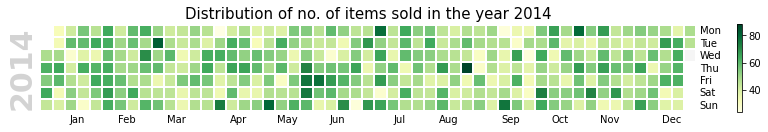

In [13]:
# Visualizing the number of distribution of grocery items sold in 2014
plt.figure(figsize=(15,10))
df2014['Date'] = pd.DatetimeIndex(df2014['Date'])
df2014.set_index("Date", inplace = True,drop = True)
events = df2014["count"]
calplot.calplot(events,cmap='YlGn')
plt.title('Distribution of no. of items sold in the year 2014',fontsize=15)
plt.show()

In [14]:
df = grocery_dataset.groupby(['itemDescription']).size().reset_index(name='count')

In [15]:
# Visualizing the distribution of items sold during 2014-15
df.loc[df['count'] < 500, 'itemDescription'] = 'Other items'
fig = px.pie(df, values='count',names = 'itemDescription',title='Distribution of items sold during 2014-15')
fig.show()

In [16]:
grocery_df = grocery_dataset.groupby('Date').agg({'itemDescription':','.join})

In [17]:
grocery_df

,itemDescription
Date,
01-01-2014,"cleaner,sausage,tropical fruit,whole milk,citr..."
01-01-2015,"canned beer,frozen meals,butter,ham,citrus fru..."
01-02-2014,"other vegetables,pip fruit,frankfurter,sugar,o..."
01-02-2015,"whole milk,canned beer,bottled water,soda,whol..."
01-03-2014,"sausage,meat,sugar,sausage,bottled beer,whole ..."
...,...
31-07-2015,"vinegar,chicken,root vegetables,chicken,sausag..."
31-08-2014,"pork,other vegetables,beef,whole milk,hygiene ..."
31-08-2015,"brown bread,frankfurter,chicken,citrus fruit,b..."


In [18]:
grocery_df['itemDescription'] = grocery_df['itemDescription'].str.split(',')

### Data preprocessing

In [19]:
transactions=[]
for i in range(0,len(grocery_df)):
    transactions.append(grocery_df['itemDescription'][i])

### Training the apriori model on the grocery items dataset

<div class="alert alert-block alert-info">
<b>Assumption:</b> The below rules contain items that have been sold for a minimum of 3 times in a day. Also, the minimum and maximum number of items in each rule is set to 3. These values are subject to changes basis business requirement.
</div>

In [20]:
from apyori import apriori
rules = apriori(transactions=transactions,min_support=0.0042,min_confidence=0.8,min_lift=3,
                min_length=3,max_length=3)

In [21]:
rules

<generator object apriori at 0x7f6f712bc4d0>

In [22]:
results = list(rules)

In [23]:
len(results)

336

In [24]:
def inspect(results):
    baseItem   = [tuple(result[2][0][0])[0:] for result in results]
    addItem     = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(baseItem,addItem, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results),columns=['BaseItems','AdditionalItems','Supports',
                                                            'Confidences','Lifts'])

In [25]:
resultsinDataFrame

,BaseItems,AdditionalItems,Supports,Confidences,Lifts
0,"(salad dressing,)",oil,0.006868,0.833333,3.111111
1,"(female sanitary products, Instant food products)",semi-finished bread,0.005495,0.800000,4.585827
2,"(mustard, Instant food products)",salt,0.005495,0.800000,7.372152
3,"(spread cheese, Instant food products)",pickled vegetables,0.005495,0.800000,4.813223
4,"(spread cheese, Instant food products)",sliced cheese,0.005495,0.800000,3.131183
...,...,...,...,...,...
331,"(syrup, specialty chocolate)",sliced cheese,0.005495,0.800000,3.131183
332,"(soft cheese, specialty fat)",sugar,0.005495,1.000000,3.370370
333,"(sparkling wine, specialty chocolate)",white wine,0.008242,0.857143,3.974522
334,"(spread cheese, spices)",specialty bar,0.005495,0.800000,3.165217


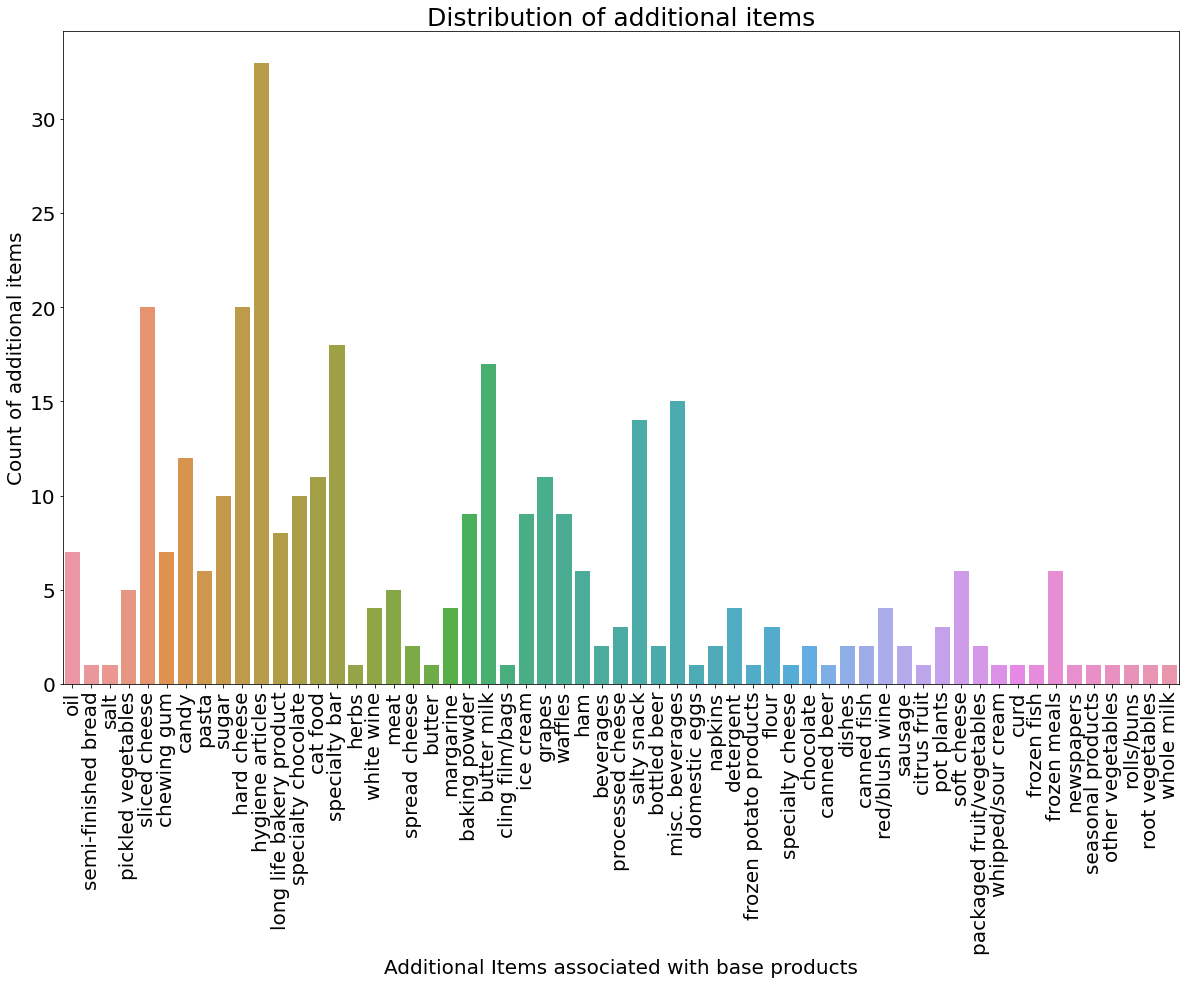

In [26]:
# Visualizing the distribution of add-on items sold with base products
plt.figure(figsize=(20,12))
sns.countplot(x='AdditionalItems',data=resultsinDataFrame)
plt.xlabel('Additional Items associated with base products',fontsize=20)
plt.ylabel('Count of additional items',fontsize=20)
plt.title('Distribution of additional items',fontsize=25)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()